In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction  (percentage)
- high blood pressure: if the patient has hypertension (boolean)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient died during the follow-up period (boolean)

Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [39]:
df=pd.read_csv('/content/drive/MyDrive/heart+failure+clinical+records/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [41]:
df.shape

(299, 13)

In [42]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [43]:
print('unique count in all columns:')
for col in df.columns:
  print(col,df[col].nunique())

unique count in all columns:
age 47
anaemia 2
creatinine_phosphokinase 208
diabetes 2
ejection_fraction 17
high_blood_pressure 2
platelets 176
serum_creatinine 40
serum_sodium 27
sex 2
smoking 2
time 148
DEATH_EVENT 2


In [44]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [45]:
df['anaemia']=df['anaemia'].astype('str')
df['diabetes']=df['diabetes'].astype('str')
df['high_blood_pressure']=df['high_blood_pressure'].astype('str')
df['sex']=df['sex'].astype('str')
df['smoking']=df['smoking'].astype('str')
df['DEATH_EVENT']=df['DEATH_EVENT'].astype('str')

<Axes: xlabel='time', ylabel='Count'>

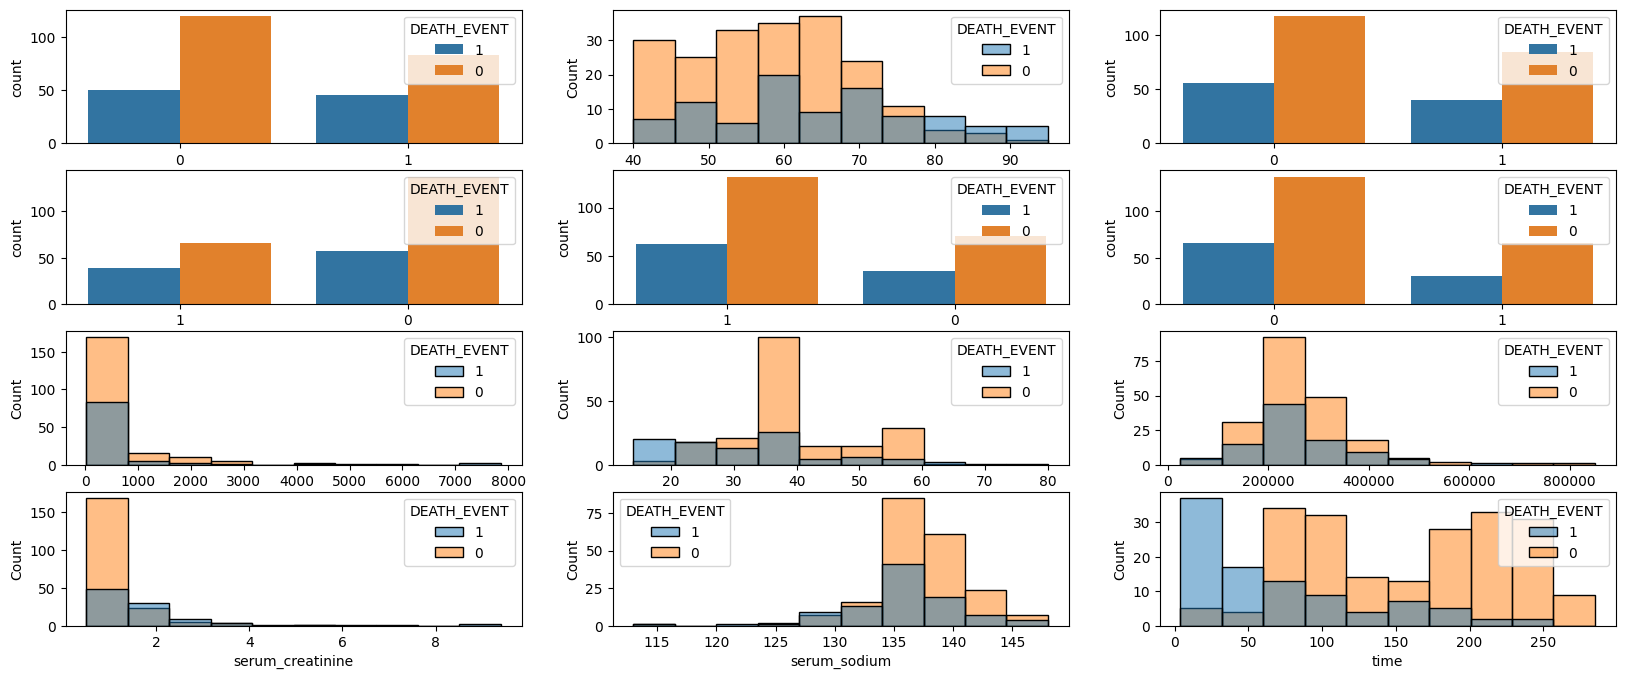

In [46]:
fig,ax=plt.subplots(4,3,figsize=(20,8))
sns.countplot(x = 'anaemia',hue='DEATH_EVENT', data = df, ax = ax[0,0])
sns.histplot(x = 'age',hue='DEATH_EVENT', data = df, ax = ax[0,1],bins=10)
sns.countplot(x = 'diabetes',hue='DEATH_EVENT', data = df, ax = ax[0,2])
sns.countplot(x = 'high_blood_pressure',hue='DEATH_EVENT', data = df, ax = ax[1,0])
sns.countplot(x = 'sex',hue='DEATH_EVENT', data = df, ax = ax[1,1])
sns.countplot(x = 'smoking',hue='DEATH_EVENT', data = df, ax = ax[1,2])
sns.histplot(x = 'creatinine_phosphokinase',hue='DEATH_EVENT', data = df, ax = ax[2,0],bins=10)
sns.histplot(x = 'ejection_fraction', data = df,hue='DEATH_EVENT', ax = ax[2,1],bins=10)
sns.histplot(x = 'platelets', data = df,hue='DEATH_EVENT', ax = ax[2,2],bins=10)
sns.histplot(x = 'serum_creatinine', data = df,hue='DEATH_EVENT', ax = ax[3,0],bins=10)
sns.histplot(x = 'serum_sodium', data = df,hue='DEATH_EVENT', ax = ax[3,1],bins=10)
sns.histplot(x = 'time', data = df,hue='DEATH_EVENT', ax = ax[3,2],bins=10)

In [47]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Label Encoding

In [48]:
#label encoding

from sklearn.preprocessing import LabelEncoder
variables = ['anaemia','diabetes','high_blood_pressure','sex', 'smoking']
le=LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

anaemia [0 1]
diabetes [0 1]
high_blood_pressure [1 0]
sex [1 0]
smoking [0 1]


Normalization

In [49]:
#normalize the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']] = scaler.fit_transform(df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']])

In [50]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502,1
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691,1
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785,1
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879,1


<ipython-input-51-f0ce284efc15>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

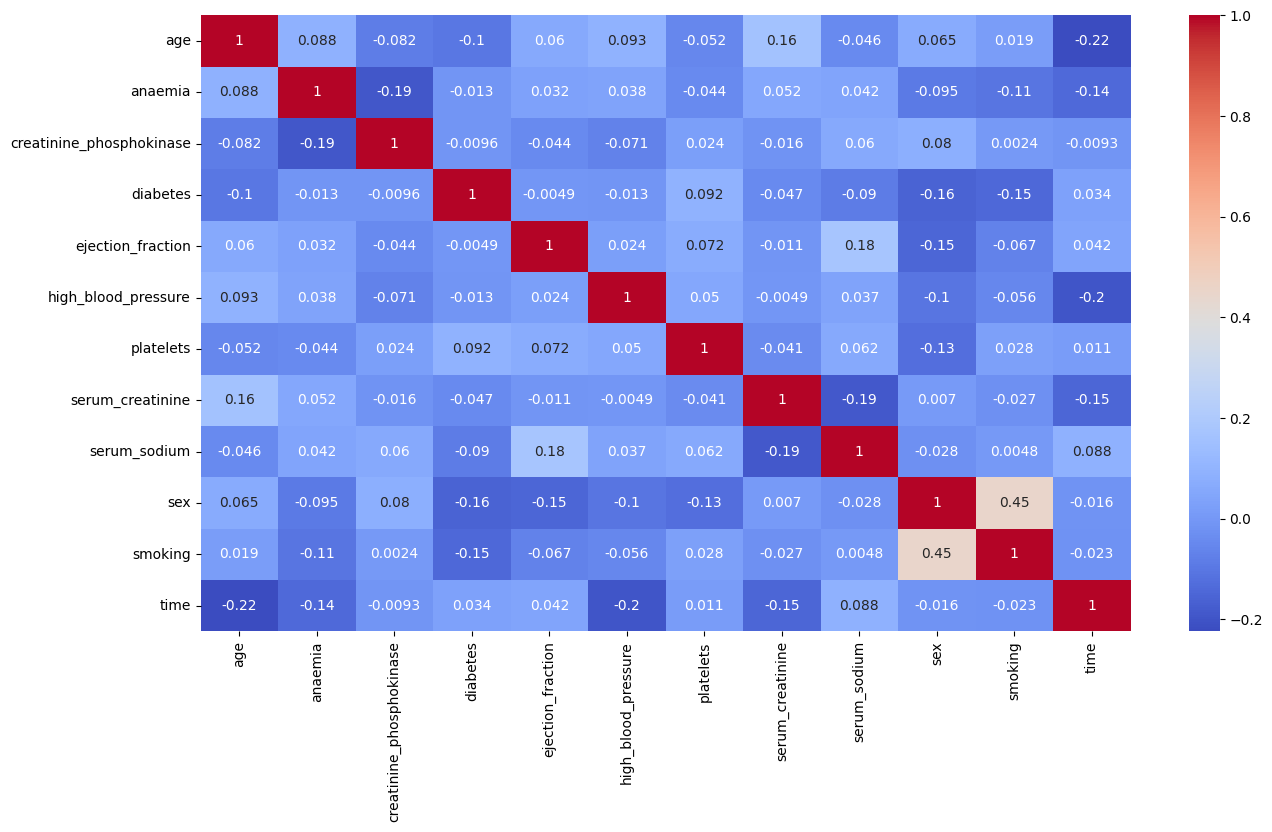

In [51]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

### Train Test Split

In [52]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('DEATH_EVENT',axis=1),df['DEATH_EVENT'],test_size=0.3,random_state=42)



```

```
# Model Building

## DecissionTreeClassifier
##RandomforestClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#creating Decision Tree Classifer object
dtree = DecisionTreeClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_dtree.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 9, 'random_state': 0}


In [54]:
best_dt_classifier = grid_dtree.best_estimator_
y_pred_dt = best_dt_classifier.predict(X_test)
y_pred_dt

In [55]:
from sklearn.ensemble import RandomForestClassifier
#creating Random Forest Classifer object
rfc = RandomForestClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [2,4,6,8,10,12,14,16,18],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_rfc.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_rfc.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 2, 'random_state': 42}


In [56]:
best_rf_classifier = grid_rfc.best_estimator_
y_pred_rf = best_rf_classifier.predict(X_test)
y_pred_rf

# Model Evaluation

# DecisionTree Classifier

###confusion Matrix Heatmap

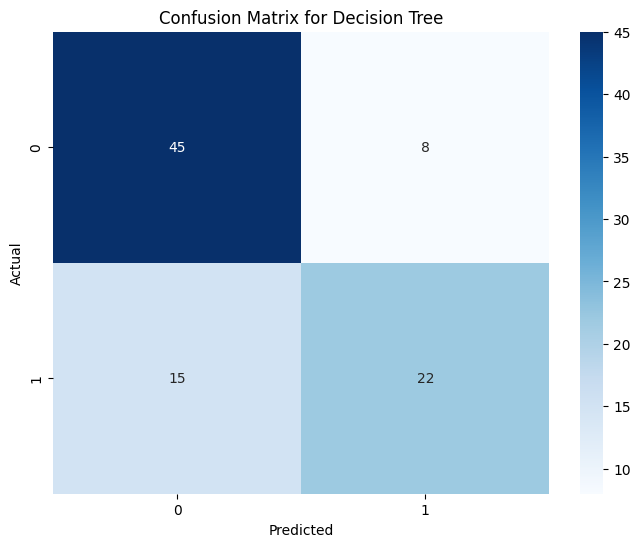

In [57]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

### Distribution Plot

<ipython-input-58-3a77de604add>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-58-3a77de604add>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_dt, hist=False, color="b", label="Fitted Values" , 

<Axes: xlabel='DEATH_EVENT', ylabel='Density'>

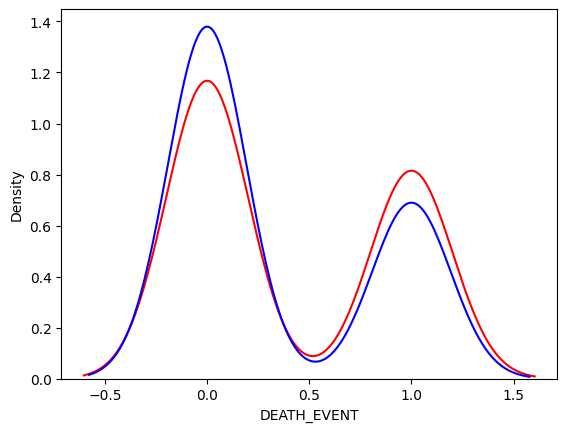

In [58]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_dt, hist=False, color="b", label="Fitted Values" , ax=ax)

### Classification Report

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        53
           1       0.73      0.59      0.66        37

    accuracy                           0.74        90
   macro avg       0.74      0.72      0.73        90
weighted avg       0.74      0.74      0.74        90



In [60]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_dt))
print("R2 Score: ", r2_score(y_test, y_pred_dt))

Accuracy Score:  0.7444444444444445
Mean Absolute Error:  0.25555555555555554
R2 Score:  -0.05558388577256479


# RandomforestClassifier

###Confusion Matrix Heatmap

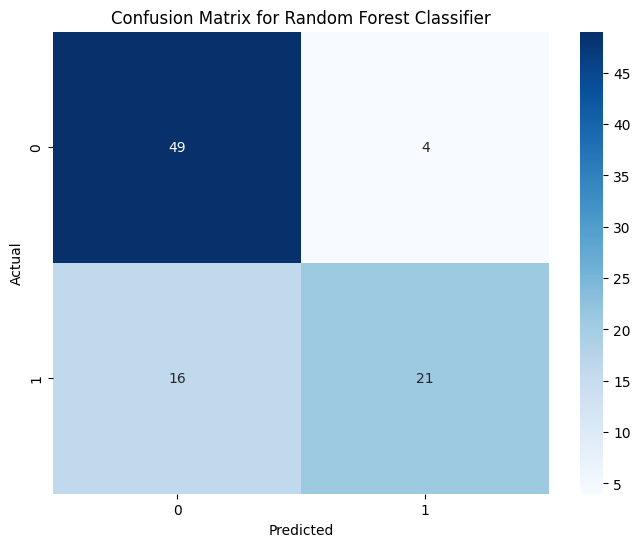

In [61]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### Distribution plot

<ipython-input-62-e770c13a4e14>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-62-e770c13a4e14>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_rf, hist=False, color="b", label="Fitted Values" , 

<Axes: xlabel='DEATH_EVENT', ylabel='Density'>

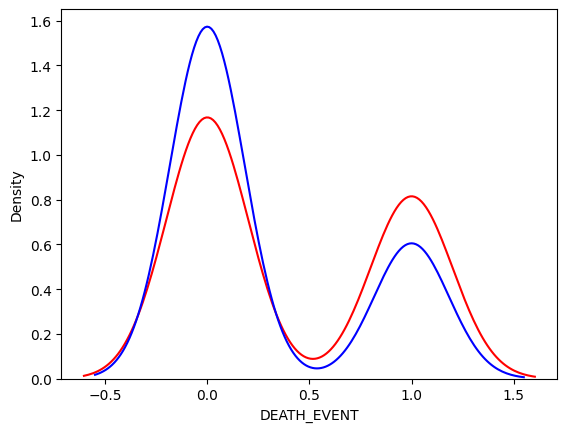

In [62]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_rf, hist=False, color="b", label="Fitted Values" , ax=ax)

### Classification Report

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        53
           1       0.84      0.57      0.68        37

    accuracy                           0.78        90
   macro avg       0.80      0.75      0.75        90
weighted avg       0.79      0.78      0.77        90



In [64]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score: ", r2_score(y_test, y_pred_rf))

Accuracy Score:  0.7777777777777778
Mean Absolute Error:  0.2222222222222222
R2 Score:  0.08210096889342178


In [66]:
dt_feature_importances = best_dt_classifier.feature_importances_
feat_imp=pd.DataFrame({'Feature': X_train.columns, 'Importance': dt_feature_importances})
feat_imp.sort_values(by='Importance',ascending=False).reset_index(drop=True)


,Feature,Importance
0,time,0.744165
1,serum_creatinine,0.178256
2,ejection_fraction,0.034849
3,creatinine_phosphokinase,0.028992
4,age,0.013738
5,anaemia,0.000000
6,diabetes,0.000000
7,high_blood_pressure,0.000000
8,platelets,0.000000
9,serum_sodium,0.000000


In [67]:
rfc_feature_importances = best_rf_classifier.feature_importances_
feat_imp=pd.DataFrame({'Feature': X_train.columns, 'Importance': rfc_feature_importances})
feat_imp.sort_values(by='Importance',ascending=False).reset_index(drop=True)


,Feature,Importance
0,time,0.390178
1,serum_creatinine,0.172712
2,ejection_fraction,0.114427
3,age,0.075340
4,platelets,0.070090
5,serum_sodium,0.065060
6,creatinine_phosphokinase,0.062131
7,sex,0.013106
8,smoking,0.009781
9,high_blood_pressure,0.009451


#Conclusion
Coming to the classification models, I have used the following models:

Decision Tree Classifier

Random Forest Classifier


Both the models were hyperparameter tuned using GridSearchCV. Both the models have nearly equal accuracy score. But, the Random Forest Classifier has a better accuracy and precision score than the Decision Tree Classifier.